<h2 style='color:blue' align="center">Decision Tree Classification</h2>

##### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Decision_tree.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [6]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [7]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [ ]:
inputs.isnull().sum()

In [9]:
inputs.Age[:20]

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [13]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [14]:
inputs.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [17]:
X_train

,Pclass,Sex,Age,Fare
809,1,2,33.000000,53.1000
144,2,1,18.000000,11.5000
852,3,2,9.000000,15.2458
399,2,2,28.000000,12.6500
264,3,2,29.699118,7.7500
...,...,...,...,...
780,3,2,13.000000,7.2292
433,3,1,17.000000,7.1250
430,1,1,28.000000,26.5500
477,3,1,29.000000,7.0458


In [18]:
X_test

,Pclass,Sex,Age,Fare
89,3,1,24.000000,8.0500
247,2,2,24.000000,14.5000
768,3,1,29.699118,24.1500
467,1,1,56.000000,26.5500
715,3,1,19.000000,7.6500
...,...,...,...,...
776,3,1,29.699118,7.7500
266,3,1,16.000000,39.6875
889,1,1,26.000000,30.0000
178,2,1,30.000000,13.0000


In [ ]:
y_test

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
model.score(X_test,y_test)

0.7877094972067039

In [25]:
y_predicted = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_predicted)
cm

array([[90, 19],
       [19, 51]], dtype=int64)

Text(69.0, 0.5, 'Truth')

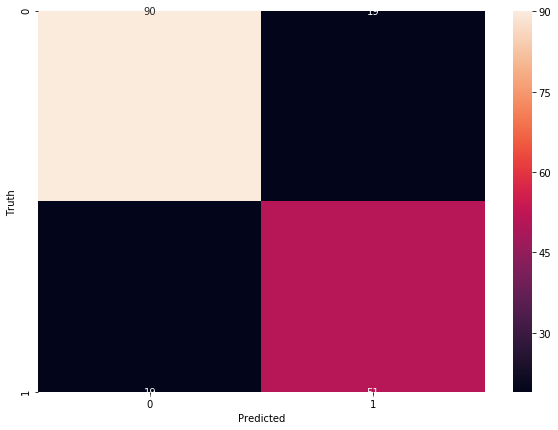

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
model.predict([[3,1,22.0,7.2500]])

array([0], dtype=int64)

**Exercise: Build decision tree model to predict salary based on certain parameters**

##### In this file using following columns build a model to predict if person would get salary more then 100k or not,
1. Company
2. Job
3. Degree

##### Calculate score of your model